# ___Hierarchical Clustering - Unsupervised Machine Learning___
---

## ___What is Hierarchical Clustering?___

_Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics. It takes away the problem of having to pre-define the number of clusters._

## ___Types of Hierarchical Clustering___

### ___Agglomerative clustering (Bottom-up approach)___ 
_Each sample is treated as a single cluster and then successively merge (or agglomerate) pairs of clusters until all clusters have been merged into a single cluster depending upon smallest differences of parameters like Euclidian._

```
given a dataset (d1, d2, d3, ....dN) of size N
# compute the distance matrix
for i=1 to N:
   # as the distance matrix is symmetric about 
   # the primary diagonal so we compute only lower 
   # part of the primary diagonal 
   for j=1 to i:
      dis_mat[i][j] = distance[di, dj] 
each data point is a singleton cluster
repeat
   merge the two cluster having minimum distance
   update the distance matrix
untill only a single cluster remains
```
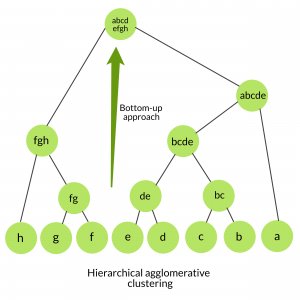

### ___Divisive clustering (top down)___ 
_A single cluster of all the samples is portioned recursively into two least similar cluster until there is one cluster for each observation. The fact is divisive clustering produces more accurate hierarchies than agglomerative clustering in some circumstances but is conceptually more complex. The divisive clustering algorithm is exactly the reverse of Agglomerative clustering._

```
given a dataset (d1, d2, d3, ....dN) of size N
at the top we have all data in one cluster
the cluster is split using a flat clustering method eg. K-Means etc
repeat
choose the best cluster among all the clusters to split
split that cluster by the flat clustering algorithm
untill each data is in its own singleton cluster
```

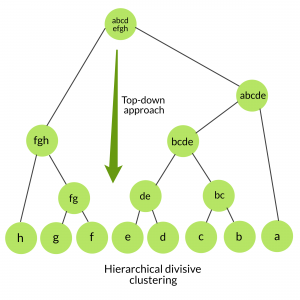

### ___Hierarchical Agglomerative vs Divisive clustering___

* _Divisive clustering is more complex as compared to agglomerative clustering, as in case of divisive clustering we need a flat clustering method as “subroutine” to split each cluster until we have each data having its own singleton cluster._


* _Divisive clustering is more efficient if we do not generate a complete hierarchy all the way down to individual data leaves. Time complexity of a naive agglomerative clustering is $O(n3)$ because we exhaustively scan the N x N matrix dist_mat for the lowest distance in each of N-1 iterations. Using priority queue data structure we can reduce this complexity to $O(n2logn)$. By using some more optimizations it can be brought down to $O(n2)$. Whereas for divisive clustering given a fixed number of top levels, using an efficient flat algorithm like K-Means, divisive algorithms are linear in the number of patterns and clusters._


* _Divisive algorithm is also more accurate. Agglomerative clustering makes decisions by considering the local patterns or neighbor points without initially taking into account the global distribution of data. These early decisions cannot be undone. whereas divisive clustering takes into consideration the global distribution of data when making top-level partitioning decisions._

## ___Steps to Perform Hierarchical Clustering___
_Following are the steps involved in agglomerative clustering:_

* _At the start, treat each data point as one cluster. Therefore, the number of clusters at the start will be K, while K is an integer representing the number of data points._
* _Form a cluster by joining the two closest data points resulting in K-1 clusters._
* _Form more clusters by joining the two closest clusters resulting in K-2 clusters._
* _Repeat the above three steps until one big cluster is formed._
* _Once single cluster is formed, dendrograms are used to divide into multiple clusters depending upon the problem._


## ___Distance Measurements/Linkage Measures___
_There are different ways to find distance between the clusters. The distance itself can be Euclidean, Manhattan or Mahalanobis distance. Following are some of the options to measure distance between two clusters:_

* _Measure the distance between the closes points of two clusters._
* _Measure the distance between the farthest points of two clusters._
* _Measure the distance between the centroids of two clusters._
* _Measure the distance between all possible combination of points between the two clusters and take the mean._

### ___Single Link Distance___
_Single link distance is defined as the minimum distance between two points in each cluster._

_Example: The distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points._

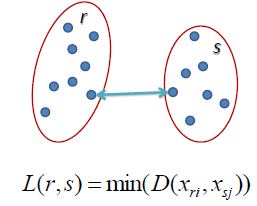

___Advantages and Disadvantages:___
* _Can handle non-elliptical shapes._
* _Produces long, elongated clusters._
* _Sensitive to outliers and noise._

### ___Complete Link Distance___
_Complete link distance is defined as the maximum distance between two points in each cluster._

_Example: the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points._

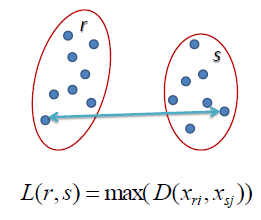

___Advantages and Disadvantages:___
* _Produces more balanced clusters (with equal diameter)._
* _Less susceptible to noise._
* _Often breaks very large clusters._
* _Small clusters are merged with large ones._

### ___Average Link Distance___
_The average distance between each point in one cluster to every point in the other cluster._

_Example the distance between clusters “r” and “s” to the left is equal to the average length each arrow between connecting the points of one cluster to the other._

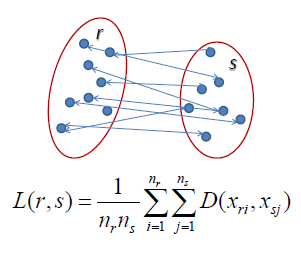

___Advantages and Disadvantages:___
* _Less susceptible to noise and outliers._
* _Biased towards globular clusters._

### ___Centroid Distance___
_Distance between centroid rj of Cluster Cj and centroid rj of Cluster Cj._
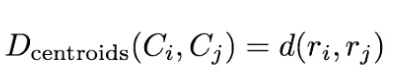

### ___Ward’s Distance___
_Ward’s distance between the clusters Ci and Cj is the difference between the total within-cluster sum of squares for the two clusters separately, and the within-cluster sum of squares resulting from merging the two clusters in cluster Cij._
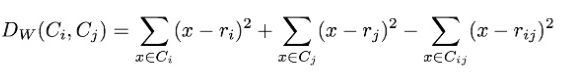

_where ri, rj, rij is the centroid of Ci, Cj, Cij._

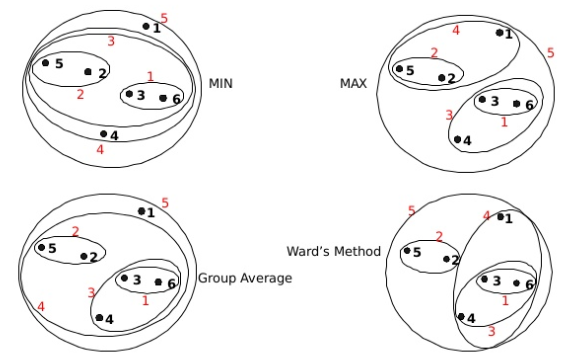

_The choice of linkage method entirely depends on you and there is no hard and fast method that will always give you good results. Different linkage methods lead to different clusters._

_The point of doing all this is to demonstrate the way hierarchical clustering works, it maintains a memory of how we went through this process and that memory is stored in __Dendrogram__._

## ___What is a Dendrogram?___

_A Dendrogram is a type of tree diagram showing hierarchical relationships between different sets of data._

_As already said a Dendrogram contains the memory of hierarchical clustering algorithm, so just by looking at the Dendrgram you can tell how the cluster is formed._

<img src='https://miro.medium.com/max/480/0*BfO2YN_BSxThfUoo.gif'/>

* _Distance between data points represents dissimilarities._
* _Height of the blocks represents the distance between clusters._

_So you can observe from the above figure that initially P5 and P6 which are closest to each other by any other point are combined into one cluster followed by P4 getting merged into the same cluster(C2). Then P1and P2 gets combined into one cluster followed by P0 getting merged into the same cluster(C4). Now P3 gets merged in cluster C2 and finally, both clusters get merged into one._


### ___When to stop merging the clusters?___

_You cut the dendrogram tree with a horizontal line at a height where the line can traverse the maximum distance up and down without intersecting the merging point._

_We can see that in figure B the largest vertical distance without any horizontal line passing through it is represented by blue line. So we draw a new horizontal red line that passes through the blue line. Since it crosses the blue line at two points, therefore the number of clusters will be 2._

_Basically the horizontal line is a threshold, which defines the minimum distance required to be a separate cluster. If we draw a line further down (Fig C), the threshold required to be a new cluster will be decreased and more clusters will be formed as see in the image below:_

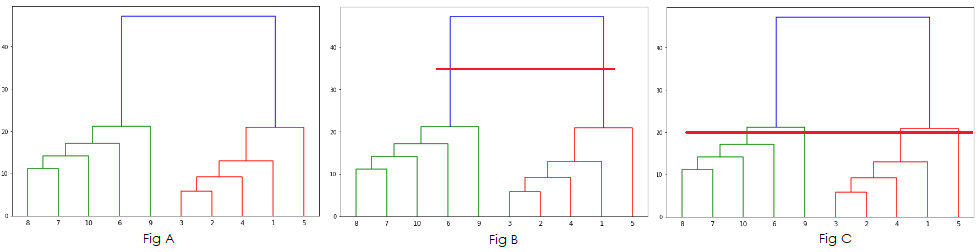


In [1]:
# Packages / libraries

import os #provides functions for interacting with the operating system

import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\PiyushSin\Desktop\datasets\Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


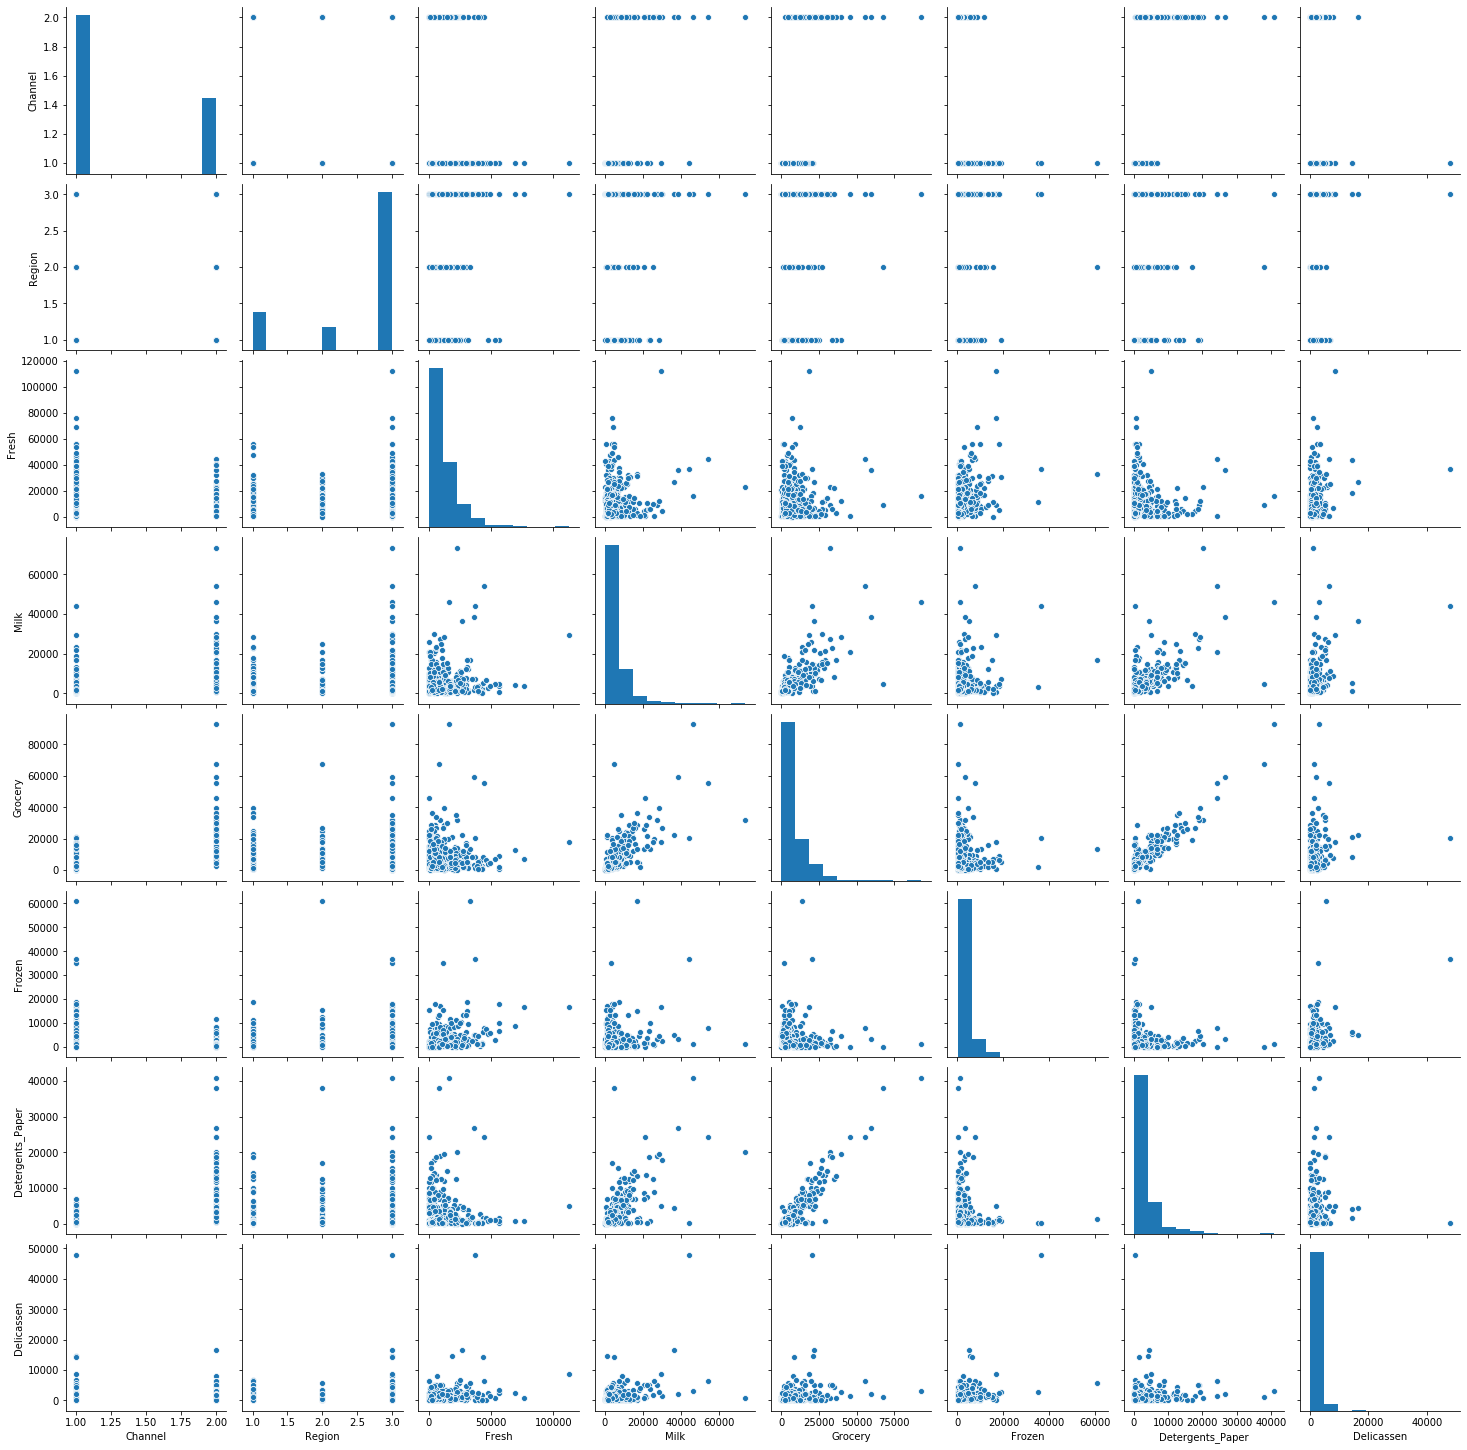

In [12]:
sns.pairplot(data)

_There are multiple product categories – Fresh, Milk, Grocery, etc. The values represent the number of units purchased by each client for each product. Our aim is to make clusters from this data that can segment similar clients together. We will, of course, use Hierarchical Clustering for this problem._

_But before applying Hierarchical Clustering, we have to normalize the data so that the scale of each variable is the same. Why is this important? Well, if the scale of the variables is not the same, the model might become biased towards the variables with a higher magnitude like Fresh or Milk (refer to the above table)._

_So, let’s first normalize the data and bring all the variables to the same scale:_

In [3]:
from sklearn.preprocessing import normalize

data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


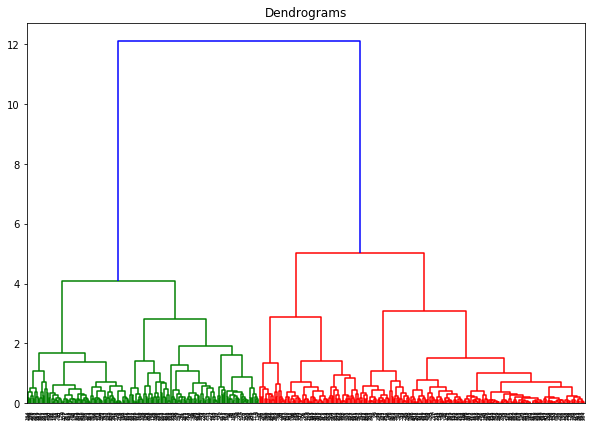

In [4]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [8]:
shc.linkage(data_scaled, method='ward')

array([[8.30000000e+01, 2.82000000e+02, 1.53464710e-02, 2.00000000e+00],
       [1.50000000e+02, 3.36000000e+02, 1.80052884e-02, 2.00000000e+00],
       [2.58000000e+02, 2.73000000e+02, 1.99150754e-02, 2.00000000e+00],
       ...,
       [8.71000000e+02, 8.73000000e+02, 4.10333306e+00, 1.83000000e+02],
       [8.74000000e+02, 8.75000000e+02, 5.02655073e+00, 2.57000000e+02],
       [8.76000000e+02, 8.77000000e+02, 1.21238165e+01, 4.40000000e+02]])

In [11]:
pdist(data_scaled) #Pairwise distances between observations in n-dimensional space.

array([0.34919509, 0.54460229, 0.65972913, ..., 0.91433676, 0.43124728,
       0.57755856])

In [10]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

coph_dists = cophenet(shc.linkage(data_scaled, method='ward'), pdist(data_scaled))
coph_dists 
# Calculate the cophenetic distances between each observation in the hierarchical clustering 
# defined by the linkage Z. The cophenetic similarity or cophenetic distance of two objects is a measure of how similar those 
# two objects have to be in order to be grouped into the same cluster.

(0.778287209777788,
 array([ 1.91984027,  1.59629082, 12.12381651, ..., 12.12381651,
         1.91984027, 12.12381651]))

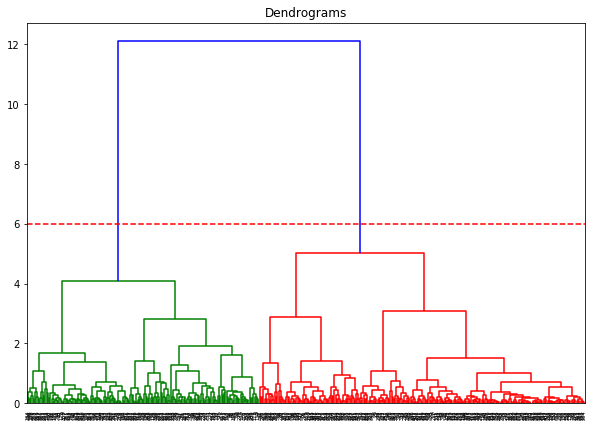

In [5]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [6]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

In [13]:
cluster.n_leaves_

440

In [15]:
cluster.labels_

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

In [16]:
cluster.children_

array([[ 83, 282],
       [150, 336],
       [258, 273],
       [114, 217],
       [220, 239],
       [ 29, 262],
       [ 39, 122],
       [134, 146],
       [124, 444],
       [133, 370],
       [126, 371],
       [241, 368],
       [269, 380],
       [129, 149],
       [288, 445],
       [ 35, 205],
       [232, 422],
       [247, 446],
       [216, 418],
       [369, 388],
       [120, 284],
       [ 90, 103],
       [ 33, 162],
       [387, 440],
       [311, 394],
       [141, 403],
       [296, 460],
       [ 54, 448],
       [191, 285],
       [210, 332],
       [ 32, 456],
       [305, 309],
       [163, 214],
       [395, 405],
       [441, 449],
       [238, 399],
       [324, 360],
       [168, 361],
       [119, 195],
       [157, 242],
       [246, 404],
       [143, 261],
       [459, 475],
       [  9, 306],
       [ 52, 132],
       [116, 318],
       [398, 401],
       [ 81, 170],
       [181, 366],
       [ 58, 474],
       [377, 454],
       [255, 356],
       [197,

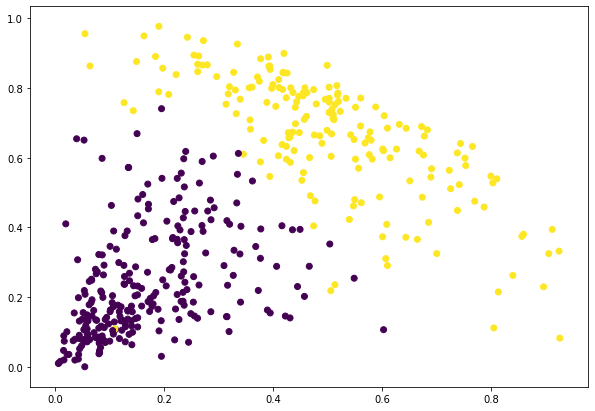

In [7]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 

In [ ]:
# plt.figure(figsize=(12,7))
# plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful')
# plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
# plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target group')
# plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'orange', label = 'Careless')
# plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
# plt.title('Clustering of customers',fontsize=20)
# plt.xlabel('Annual Income (k$)',fontsize=16)
# plt.ylabel('Spending Score (1-100)',fontsize=16)
# plt.legend(fontsize=16)
# plt.grid(True)
# plt.axhspan(ymin=60,ymax=100,xmin=0.4,xmax=0.96,alpha=0.3,color='yellow')
# plt.show()

## ___Difference between K-means and Hierarchical Clustering___

<table><tbody><tr><td></td><td><strong>K-Means Clustering</strong></td><td><strong>Hierarchical Clustering</strong></td></tr><tr><td><strong>Category</strong></td><td> Centroid based, partition-based</td><td> Hierarchical, Agglomerative </td></tr><tr><td><strong> Method to find the optimal number of clusters </strong></td><td> The Elbow method using WCSS </td><td>Dendrogram</td></tr><tr><td><strong> Directional approach </strong></td><td> Not any, the only centroid is considered to form clusters </td><td> Top-down, bottom-up </td></tr><tr><td><strong> Python Library </strong></td><td> sklearn – KMeans </td><td> sklearn-AgglomerativeClustering </td></tr></tbody></table>

## ___Advantages and Disadvantages___

### ___Advantages___
* _No prior information about the number of clusters is required._
* _Easy to implement and gives the best result in most cases._

### ___Disadvantages___
* _The minimum time complexity of O(n2 log n) is required (where n is the number of samples)._
* _It can never undo what has done previously._
* _Difficulty in breaking large clusters._
* _Sensitive to noise and outliers._
* _In case of a large number of clusters, it is difficult to identify them in the dendrogram._

## ___Applications___
* _Recommendation engines_
* _Social media analysis_
* _Search result grouping_
* _Image segmentation_